<a href="https://colab.research.google.com/github/KarolG96/ML_project/blob/main/Projekt_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
https://www.kaggle.com/datasets/rabieelkharoua/predict-online-dating-matches-dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler,MinMaxScaler,PowerTransformer,FunctionTransformer
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from xgboost.sklearn import XGBRegressor
import warnings
warnings.filterwarnings("ignore")


import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
import plotly
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
from plotly import tools


%matplotlib inline

In [ ]:
data = pd.read_csv('C:/Users/kgajda/NoBackup/Dataset.csv')

In [ ]:
file_path = 'C:\Users\kgajda\NoBackup\Dataset.csv'
print(f"Attempting to read file from: {file_path}")

try:
    data = pd.read_csv(file_path)
    print(data.head())  # Wyświetlenie kilku pierwszych wierszy ramki danych
except FileNotFoundError:
    print(f"Error: File '{file_path}' not found.")

In [ ]:
from google.colab import files

uploaded = files.upload()

for name, data in uploaded.items():
    with open(name, 'wb') as f:
        f.write(data)

print('Uploaded files:')
!ls

Saving Dataset.csv to Dataset.csv
Uploaded files:
Dataset.csv  sample_data


In [ ]:
data = pd.read_csv('Dataset.csv')
print(data.head())

   Gender  PurchasedVIP  Income  Children  Age  Attractiveness  Matches
0       0             1   51777         3   47               5       70
1       1             0   36646         0   42               7      130
2       0             0   53801         1   25               5        0
3       0             0   56105         0   35               8        0
4       0             0   55597         1   36               6        0


In [ ]:
data.shape

(1000, 7)

In [ ]:
df = data.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Gender          1000 non-null   int64
 1   PurchasedVIP    1000 non-null   int64
 2   Income          1000 non-null   int64
 3   Children        1000 non-null   int64
 4   Age             1000 non-null   int64
 5   Attractiveness  1000 non-null   int64
 6   Matches         1000 non-null   int64
dtypes: int64(7)
memory usage: 54.8 KB


In [ ]:
df.describe()

,Gender,PurchasedVIP,Income,Children,Age,Attractiveness,Matches
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.51000,0.474000,50988.447000,0.978000,34.616000,5.624000,76.05000
std,0.50015,0.499573,9889.336141,0.997251,9.147799,2.824288,52.71315
min,0.00000,0.000000,20786.000000,0.000000,18.000000,1.000000,0.00000
25%,0.00000,0.000000,44358.500000,0.000000,27.000000,3.000000,0.00000
50%,1.00000,0.000000,50841.500000,1.000000,35.000000,6.000000,70.00000
75%,1.00000,1.000000,57396.000000,2.000000,43.000000,8.000000,120.00000
max,1.00000,1.000000,81931.000000,3.000000,49.000000,10.000000,160.00000


In [ ]:
df[20:30]

,Gender,PurchasedVIP,Income,Children,Age,Attractiveness,Matches
20,1,0,59382,0,42,8,140
21,0,0,44839,1,34,2,0
22,1,1,50961,0,30,7,130
23,1,1,45377,0,35,4,100
24,1,1,45655,1,19,9,150
25,1,1,46908,2,30,1,70
26,1,1,52221,1,30,7,130
27,1,0,45212,2,39,6,120
28,1,0,62557,3,32,8,140
29,1,0,41053,0,37,5,110


In [ ]:
def scatter_plot(x,y, hue, data=df):
  plt.figure(figsize=(15,9))
  sns.scatterplot(data=data, x=x, y=y, marker='o', hue=hue);

In [ ]:
# Funkcja do tworzenia wykresu rozrzutu
def scatter_plot(x_column, y_column, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(df[x_column], df[y_column], alpha=0.5)
    plt.title(title)
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.show()

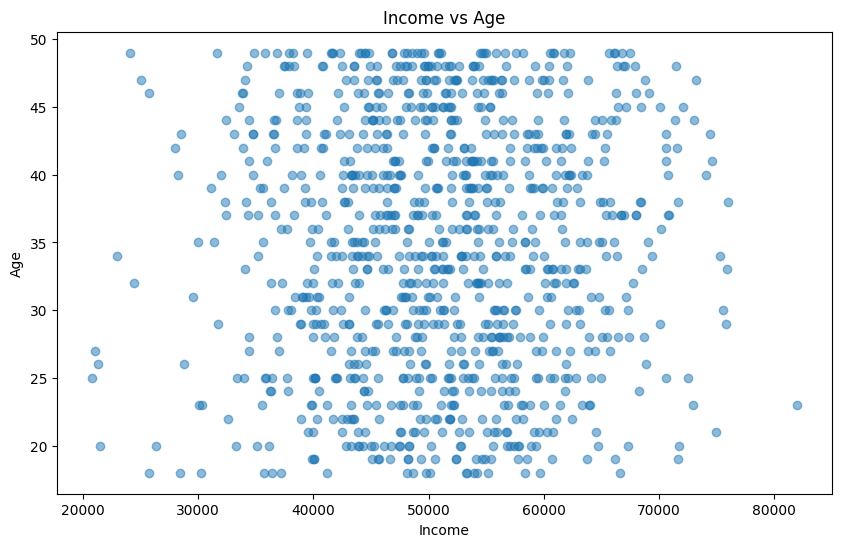

In [ ]:
# Przykłady wykresów rozrzutu
scatter_plot('Income', 'Age', 'Income vs Age')

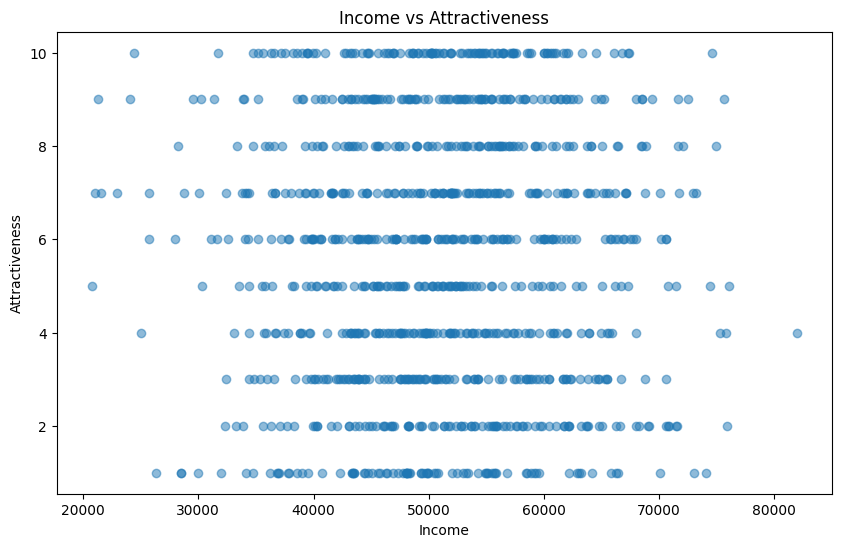

In [ ]:
scatter_plot('Income', 'Attractiveness', 'Income vs Attractiveness')

<Axes: >

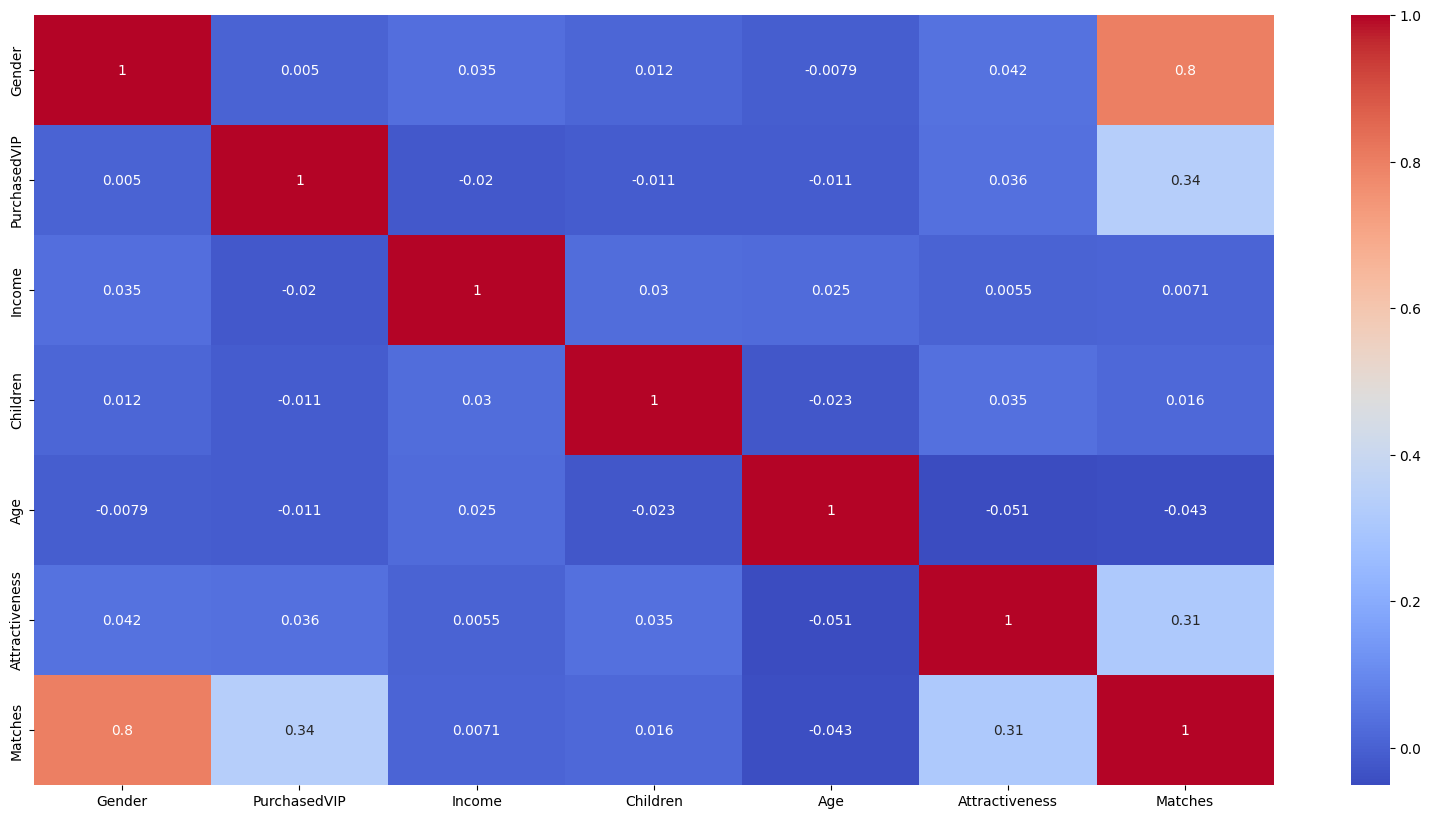

In [ ]:
plt.figure(figsize=(20,10))

#plot heat map
sns.heatmap(df.corr(),annot=True,cmap="coolwarm",linecolor='black')

In [ ]:
#Dzięki tej funkcji możemy wybierać bardzo skorelowane niezależne cechy.
#Usunie ona pierwszą cechę, która jest skorelowana z jakąkolwiek inną cechą.
def correlation(df,threshold):
    coll_corr=set() #Taki zbiór zawiera wszystkie nazwy kolumn, które są skorelowane.
    corr_matrix=df.corr()
    for i in range (len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])> threshold:
                colname=corr_matrix.columns[i] #pobieranie nazw kolumn
                coll_corr.add(colname)
    return coll_corr

In [ ]:
#wywolanie funkcji
corr_feature = correlation(df.iloc[:,:-1],0.85)
len(set(corr_feature))

0

WIZUALIZACJE


In [ ]:
df.head()

,Gender,PurchasedVIP,Income,Children,Age,Attractiveness,Matches
0,0,1,51777,3,47,5,70
1,1,0,36646,0,42,7,130
2,0,0,53801,1,25,5,0
3,0,0,56105,0,35,8,0
4,0,0,55597,1,36,6,0


In [ ]:
numeric_col=["Income","Age","Attractiveness","Matches"]

In [ ]:
import plotly.io as pio
pio.renderers.default = 'colab'

df[numeric_col].iplot(kind='histogram',subplots=True)

In [ ]:
i=1
for col in numeric_col:
    fig = px.box(df, x=col, points="all",template="plotly_dark",width=500,height=250)

    fig.show()


In [ ]:
encoded_cat=["Gender",'PurchasedVIP','Children']

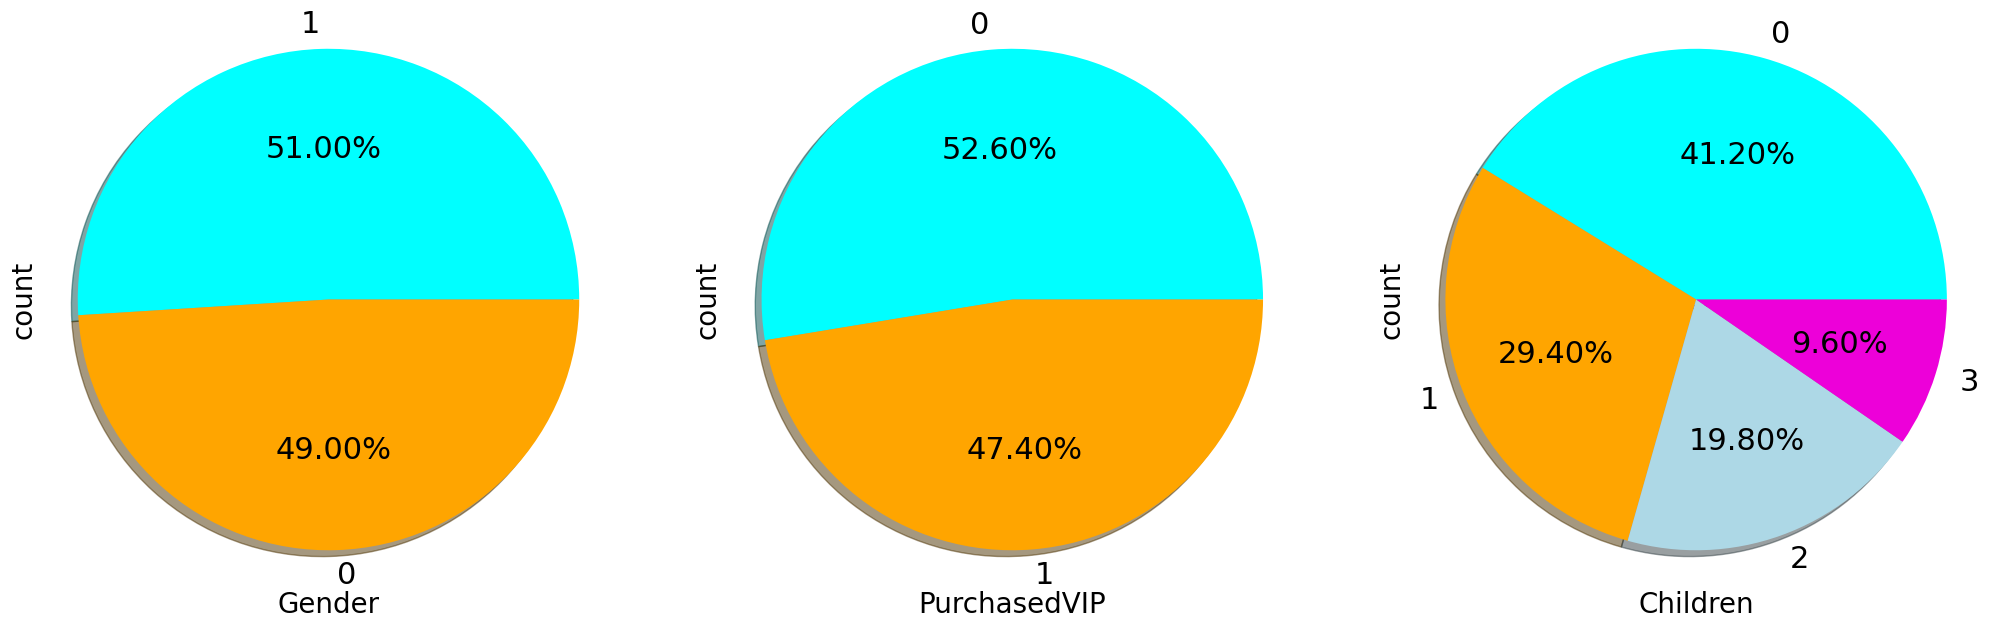

In [ ]:
i=1
colors=["#00FFFF","#FFA500","#ADD8E6","#ED00D9","#ED1400"]
textprops = {"fontsize":22}
plt.figure(figsize=(25,120))
for col in encoded_cat:
    plt.subplot(11,3,i)
    df[col].value_counts().plot(kind="pie",autopct="%.2f%%",colors=colors,textprops=textprops,shadow=True, radius = 1.1)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel(col,fontsize=20)
    plt.ylabel("count",fontsize=20)
    i=i+1

    # Płeć: 0 (Male), 1 (Female)

ML i inzynieria danych


In [ ]:
# Otrzymać kolumny cech x i kolumnę docelową y.
X=df.iloc[:,0:-1]
y=df.Matches

In [ ]:
X.head()

,Gender,PurchasedVIP,Income,Children,Age,Attractiveness
0,0,1,51777,3,47,5
1,1,0,36646,0,42,7
2,0,0,53801,1,25,5
3,0,0,56105,0,35,8
4,0,0,55597,1,36,6


In [ ]:
# Detekcja i usuwanie wartości odstających (outliers) to proces identyfikacji i eliminacji danych, które znacząco odbiegają od reszty danych w zbiorze.
def outlier(data):
    mean = data.mean()
    std = data.std()

    # granice dla wartości odstających
    highest = mean + 3 * std
    lowest = mean - 3 * std

    #  wartości odstające
    outliers = data[(data > highest) | (data < lowest)]

    return outliers

# wykrywania i usuwania wartości odstających
def detect_and_remove_outliers(df, columns):
    outliers_df = pd.DataFrame()  # DataFrame do przechowywania wierszy odstających
    for col in columns:
        if col in df.columns:
            test = outlier(df[col])
            print("Column name:", col)
            print("Number of outliers:", len(test))
            print("\n")
            outliers_rows = df.loc[test.index]
            print("Outliers rows:")
            print(outliers_rows)
            print("<<<<<<<<<------------------------------------->>>>>>>>>")
            print("\n")
            outliers_df = pd.concat([outliers_df, outliers_rows])

    # Tylko dla ramki danych o nazwie DataFrame
    df = df.drop(outliers_df.index, axis=0)

    return df, outliers_df


numeric_cols = ["Income", "Age", "Attractiveness"]
cleaned_df, outliers = detect_and_remove_outliers(X, numeric_cols)

Column name: Income
Number of outliers: 4


Outliers rows:
     Gender  PurchasedVIP  Income  Children  Age  Attractiveness
321       0             0   21037         0   27               7
759       0             0   21277         2   26               9
811       0             0   20786         0   25               5
835       1             1   81931         0   23               4
<<<<<<<<<------------------------------------->>>>>>>>>


Column name: Age
Number of outliers: 0


Outliers rows:
Empty DataFrame
Columns: [Gender, PurchasedVIP, Income, Children, Age, Attractiveness]
Index: []
<<<<<<<<<------------------------------------->>>>>>>>>


Column name: Attractiveness
Number of outliers: 0


Outliers rows:
Empty DataFrame
Columns: [Gender, PurchasedVIP, Income, Children, Age, Attractiveness]
Index: []
<<<<<<<<<------------------------------------->>>>>>>>>




In [ ]:
print("Wartosci odstajace:")
outliers

Wartosci odstajace:


,Gender,PurchasedVIP,Income,Children,Age,Attractiveness
321,0,0,21037,0,27,7
759,0,0,21277,2,26,9
811,0,0,20786,0,25,5
835,1,1,81931,0,23,4


Podział na zbiór treningowy i testowy (train-test split) to technika używana w uczeniu maszynowym do oceny wydajności modelu. Polega ona na podziale dostępnych danych na dwa zbiory: jeden do trenowania modelu (train set) i drugi do testowania jego wydajności (test set).

Dlaczego jest to ważne?
Ocena wydajności modelu: Podział na zbiór treningowy i testowy pozwala ocenić, jak dobrze model generalizuje do nowych, niewidocznych wcześniej danych.
Unikanie przeuczenia (overfitting): Trening i testowanie modelu na różnych zbiorach danych pomaga w identyfikacji przypadków, gdzie model uczy się specyfiki danych treningowych zamiast ogólnych wzorców.
Jak to zrobić?
Najczęściej używaną metodą podziału danych jest funkcja train_test_split z biblioteki scikit-learn.

In [ ]:
#Podział na zbiór treningowy i testowy
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print("X_train shape: ",x_train.shape)
print("X_test shape: ",x_test.shape)
print()
print("Y_train shape: ",y_train.shape)
print("Y_test shape: ",y_test.shape)

X_train shape:  (800, 6)
X_test shape:  (200, 6)

Y_train shape:  (800,)
Y_test shape:  (200,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Inicjalizuj modele
lr_model = LinearRegression()

#  trening i ocena regresji liniowej
lr_model.fit(x_train, y_train)
y_pred_lr = lr_model.predict(x_test)
print("Linear Regression - RMSE:", mean_squared_error(y_test, y_pred_lr, squared=False))
print("Linear Regression - R^2 Score:", r2_score(y_test, y_pred_lr))

Linear Regression - RMSE: 22.767153038032884
Linear Regression - R^2 Score: 0.8097536666224239


Skalowanie cech (Scaling the features) to proces przekształcania danych w taki sposób, aby wszystkie cechy (features) miały podobny zakres wartości. Jest to ważne w kontekście uczenia maszynowego, ponieważ wiele algorytmów jest wrażliwych na skalę danych i działają lepiej, gdy cechy są na podobnych skalach.

Dlaczego skalowanie cech jest ważne?
Poprawa wydajności modeli: Algorytmy takie jak regresja liniowa, k-NN, SVM czy algorytmy oparte na gradientach działają lepiej, gdy cechy mają podobne skale.


In [ ]:
# użycie standardowego skalera
sc=StandardScaler()

x_train_scaled=sc.fit_transform(x_train)
x_test_scaled=sc.transform(x_test)

x_train = pd.DataFrame(x_train_scaled, columns = x_train.columns[:])
x_test = pd.DataFrame(x_test_scaled, columns = x_test.columns[:])
x_train.head()

,Gender,PurchasedVIP,Income,Children,Age,Attractiveness
0,0.987577,-0.951190,-0.993861,-0.968627,0.277380,-0.229082
1,0.987577,1.051315,-1.409589,-0.968627,1.613480,-1.652503
2,0.987577,1.051315,0.543598,-0.968627,-0.502012,0.126773
3,0.987577,-0.951190,-0.403749,2.023271,0.500063,0.126773
4,-1.012579,1.051315,0.195330,-0.968627,0.611405,0.126773


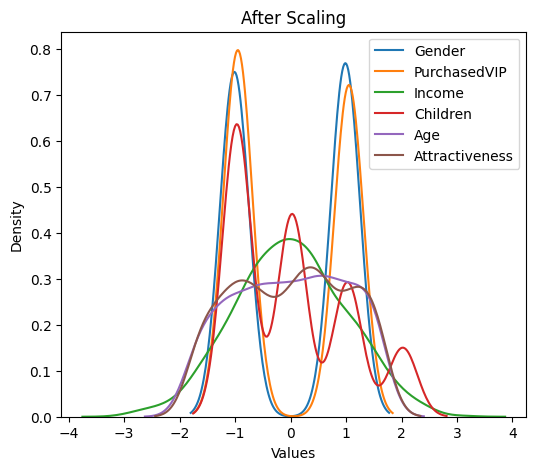

In [ ]:
plt.figure(figsize=(6, 5))
plt.title('After Scaling')
plt.xlabel('Values')
for col in x_train.columns:
    sns.kdeplot(x_train[col], label=col)
plt.legend()
plt.show()

Trening i predykcja modelu

In [ ]:
# Funkcja do oceny modeli z cechami i zmienną docelową.
def models_score(models, x_train, x_test, y_train, y_test):
    scores = {}

    for name, model in models.items():
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mse)  # oblicz RMSE

        scores[name] = {
            'R2 Score': r2,
            'MSE': mse,
            'MAE': mae,
            'RMSE': rmse
        }

        # Wypisanie nazwy modelu oraz metryk oceny.
        print("Model name:", name)
        print("R2 Score:", r2)
        print("MSE:", mse)
        print("MAE:", mae)
        print("RMSE:", rmse)
        print("\n<<<<------------------------------------------------------------->>>>\n")

    # Utwórz DataFrame z słownika wyników.
    model_scores = pd.DataFrame(scores).transpose()
    model_scores = model_scores.sort_values('R2 Score', ascending=False)

    return model_scores

In [ ]:
#inicjalizacja modeli
models = {"LinearRegression":LinearRegression(),
          "AdaBoost":AdaBoostRegressor(),
          "GradiantBoost":GradientBoostingRegressor(),
         "RandomForest":RandomForestRegressor(),
         "XgBoost": XGBRegressor(),
         "KNeighborsRegressor":KNeighborsRegressor(),
         "DecisionTree":DecisionTreeRegressor()}

In [ ]:
# funkcja do oceny modeli
scores = models_score(models, x_train, x_test, y_train, y_test)

Model name: LinearRegression
R2 Score: 0.8097536666224447
MSE: 518.3432574571533
MAE: 18.882676848899948
RMSE: 22.76715303803164

<<<<------------------------------------------------------------->>>>

Model name: AdaBoost
R2 Score: 0.9908007829893114
MSE: 25.064094675151928
MAE: 3.091126090745393
RMSE: 5.006405364645569

<<<<------------------------------------------------------------->>>>

Model name: GradiantBoost
R2 Score: 0.9999999982573128
MSE: 4.748108100668337e-06
MAE: 0.0016584262993781448
RMSE: 0.0021790153970700473

<<<<------------------------------------------------------------->>>>

Model name: RandomForest
R2 Score: 1.0
MSE: 0.0
MAE: 0.0
RMSE: 0.0

<<<<------------------------------------------------------------->>>>

Model name: XgBoost
R2 Score: 0.999999999998642
MSE: 3.7000117589861184e-09
MAE: 4.5614556947839444e-05
RMSE: 6.082772196117588e-05

<<<<------------------------------------------------------------->>>>

Model name: KNeighborsRegressor
R2 Score: 0.9889377851

In [ ]:
# przygotowanie  DataFrame do wizualizacji
model_scores = scores.reset_index().rename({"index": "Algorithms"}, axis=1)

In [ ]:
model_scores

,Algorithms,R2 Score,MSE,MAE,RMSE
0,RandomForest,1.000000,0.000000e+00,0.000000,0.000000
1,DecisionTree,1.000000,0.000000e+00,0.000000,0.000000
2,XgBoost,1.000000,3.700012e-09,0.000046,0.000061
3,GradiantBoost,1.000000,4.748108e-06,0.001658,0.002179
4,AdaBoost,0.990801,2.506409e+01,3.091126,5.006405
5,KNeighborsRegressor,0.988938,3.014000e+01,3.230000,5.489991
6,LinearRegression,0.809754,5.183433e+02,18.882677,22.767153


WIZUALIZACJE MODEL SCORE

In [ ]:
model_scores_r2 = model_scores.iloc[:,0:2]

In [ ]:
model_scores_r2.style.bar()

,Algorithms,R2 Score
0,RandomForest,1.000000
1,DecisionTree,1.000000
2,XgBoost,1.000000
3,GradiantBoost,1.000000
4,AdaBoost,0.990801
5,KNeighborsRegressor,0.988938
6,LinearRegression,0.809754


In [ ]:
# wizualizacja wynikow R2
fig_r2 = px.bar(data_frame=model_scores,
                x="Algorithms",
                y="R2 Score",
                color="Algorithms",
                title="<b>Models R2 Score</b>",
                template='plotly_dark')

fig_r2.update_layout(bargap=0.2)
fig_r2.show()

Wersja forest i regresja liniowa


In [ ]:
df[0:20]


In [ ]:
df.info()

In [ ]:
df.isnull().sum()

Gender            0
PurchasedVIP      0
Income            0
Children          0
Age               0
Attractiveness    0
Matches           0
dtype: int64

In [ ]:
df.sample(20, random_state=101)

,Gender,PurchasedVIP,Income,Children,Age,Attractiveness,Matches,Year,Month,Day
545,1,1,30245,1,18,9,150,2045,6,30
298,0,0,65007,1,28,5,0,2024,11,30
109,0,0,61087,0,27,2,0,2009,2,28
837,0,1,42482,1,22,9,70,2069,10,31
194,0,1,45538,0,48,5,70,2016,3,31
605,0,0,52992,1,25,5,0,2050,6,30
246,0,1,50380,0,32,4,70,2020,7,31
693,1,0,50146,3,18,10,160,2057,10,31
802,0,0,39841,1,23,6,0,2066,11,30
406,1,1,40175,0,25,5,110,2033,11,30


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.nunique()

Gender              2
PurchasedVIP        2
Income            989
Children            4
Age                32
Attractiveness     10
Matches            11
dtype: int64

In [ ]:
df.describe().transpose()


In [ ]:
df.head()

In [ ]:
#linear regression model
model_lr = LinearRegression()
model_lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = model_lr.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(mse)
print(r2)

518.3432574571533
0.8097536666224447


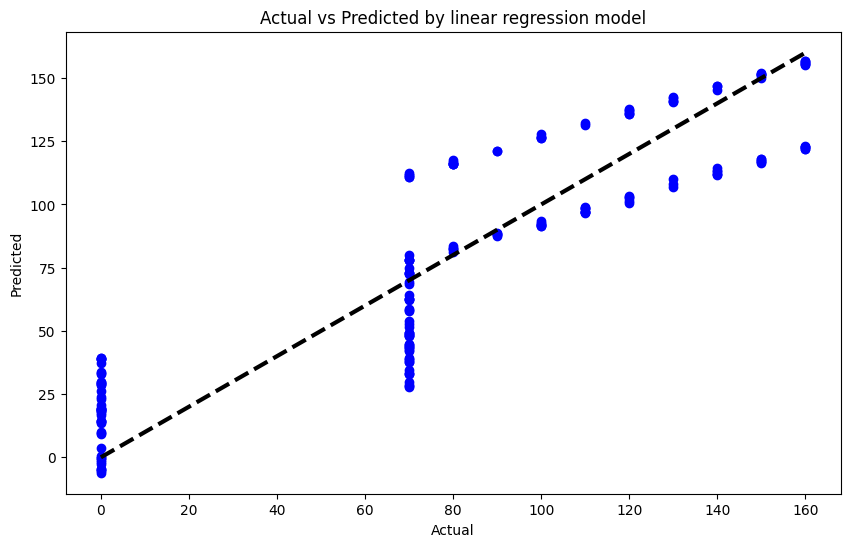

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted by linear regression model')
plt.show()

In [ ]:
results_lr = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred.astype(int)
})
results_lr

In [ ]:
lr_single1=np.array([[62, 18, 83, 69, 0, 0]]) #68  # Add two more features
lr_single2=np.array([[25, 14, 94, 98, 0, 0]]) #19  # Add two more features
lr_single3=np.array([[40, -2, 81, 95, 0, 0]]) #68  # Add two more features
model_lr.predict(lr_single3)

array([1669.19813597])

In [ ]:
from sklearn.ensemble import RandomForestRegressor

#Random Forest model
rf_model = RandomForestRegressor(n_estimators=150, max_depth=7, random_state=42)
rf_model.fit(x_train, y_train)

RandomForestRegressor(max_depth=7, n_estimators=150, random_state=42)

In [ ]:
y_pred_rf = rf_model.predict(x_test)

In [ ]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [ ]:
print(mse_rf)
print(r2_rf)

0.0
1.0


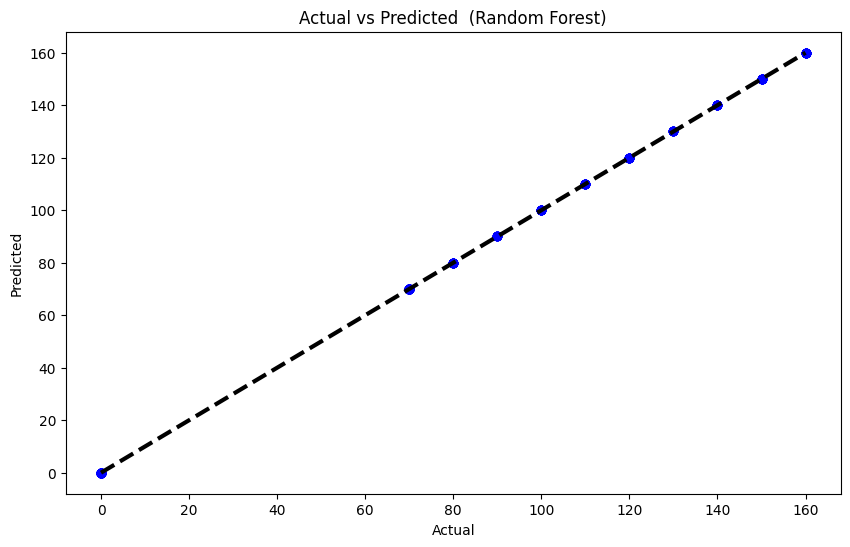

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted  (Random Forest)')
plt.show()

In [ ]:
results_rf_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_rf.astype(int)
})
results_rf_df

,Actual,Predicted
521,0,0
737,0,0
740,70,70
660,100,100
411,130,130
...,...,...
408,110,110
332,160,160
208,110,110
613,80,80


In [ ]:
lr_single1=np.array([[62, 18, 83, 69, 0, 0]]) #68  # Add two more features to match the training data
lr_single2=np.array([[25, 14, 94, 98, 0, 0]]) #19  # Add two more features to match the training data
lr_single3=np.array([[40, -2, 81, 95, 0, 0]]) #68  # Add two more features to match the training data
rf_model.predict(lr_single1)

array([120.])

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

#Logistic Regression model
model_log_reg = LogisticRegression(random_state=20, max_iter=2000)
model_log_reg.fit(x_train, y_train)

y_pred_logr = model_log_reg.predict(X_test)


In [ ]:
results_logr_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_logr.astype(int)
})
results_logr_df

,Actual,Predicted
521,0,0
737,0,0
740,70,70
660,100,100
411,130,130
...,...,...
408,110,120
332,160,160
208,110,100
613,80,100


In [ ]:
r2_logr = r2_score(y_test, y_pred_logr)
mse_logr = mean_squared_error(y_test, y_pred_logr)

print(mse_logr)
print(r2_logr)

30.5
0.9888056551627952


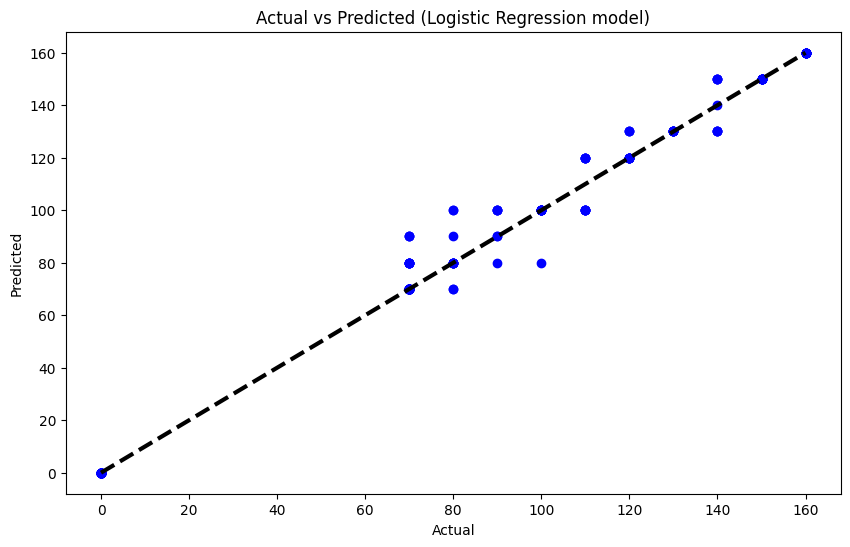

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_logr, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (Logistic Regression model)')
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential

In [ ]:
# definicja funkcji tf_model
def tf_model():
    model = Sequential()
    model.add(Dropout(0.2))  # Dodaj warstwę Dropout dla regularyzacji.
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))  # Warstwa wyjściowa dla regresji.
    return model

model_tf=tf_model()

model_tf.compile(optimizer='rmsprop', loss='mean_squared_error', metrics=['accuracy'])
history=model_tf.fit(x_train, y_train, epochs=40, batch_size=23, validation_split=0.15)

print()
train_loss = model_tf.evaluate(x_train, y_train)
test_loss = model_tf.evaluate(x_test, y_test)
print(f'Train Loss: {train_loss}')
print(f'Test Loss: {test_loss}')

y_pred_tf = model_tf.predict(x_test)

Epoch 1/40
30/30 [==============================] - 2s 29ms/step - loss: 8524.6914 - accuracy: 0.1618 - val_loss: 7722.6470 - val_accuracy: 0.1250
Epoch 2/40
30/30 [==============================] - 0s 2ms/step - loss: 8393.4092 - accuracy: 0.0426 - val_loss: 7611.5908 - val_accuracy: 0.0000e+00
Epoch 3/40
30/30 [==============================] - 0s 3ms/step - loss: 8257.3818 - accuracy: 0.0000e+00 - val_loss: 7488.8931 - val_accuracy: 0.0000e+00
Epoch 4/40
30/30 [==============================] - 0s 3ms/step - loss: 8106.5742 - accuracy: 0.0000e+00 - val_loss: 7356.6963 - val_accuracy: 0.0000e+00
Epoch 5/40
30/30 [==============================] - 0s 3ms/step - loss: 7950.1030 - accuracy: 0.0000e+00 - val_loss: 7207.9087 - val_accuracy: 0.0000e+00
Epoch 6/40
30/30 [==============================] - 0s 3ms/step - loss: 7756.1836 - accuracy: 0.0000e+00 - val_loss: 7042.3862 - val_accuracy: 0.0000e+00
Epoch 7/40
30/30 [==============================] - 0s 3ms/step - loss: 7557.0913 - acc

In [ ]:
r2_tf = r2_score(y_test, y_pred_tf)
mse_tf = mean_squared_error(y_test, y_pred_tf)

print(mse_tf)
print(r2_tf)

519.4466763586548
0.809348681321353


In [ ]:
#y_pred_tf

In [ ]:
y_pred_tf_flat=y_pred_tf.reshape(-1)
results_tf = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_tf_flat.astype(int)
})
results_tf

,Actual,Predicted
521,0,19
737,0,24
740,70,32
660,100,77
411,130,127
...,...,...
408,110,95
332,160,124
208,110,85
613,80,65


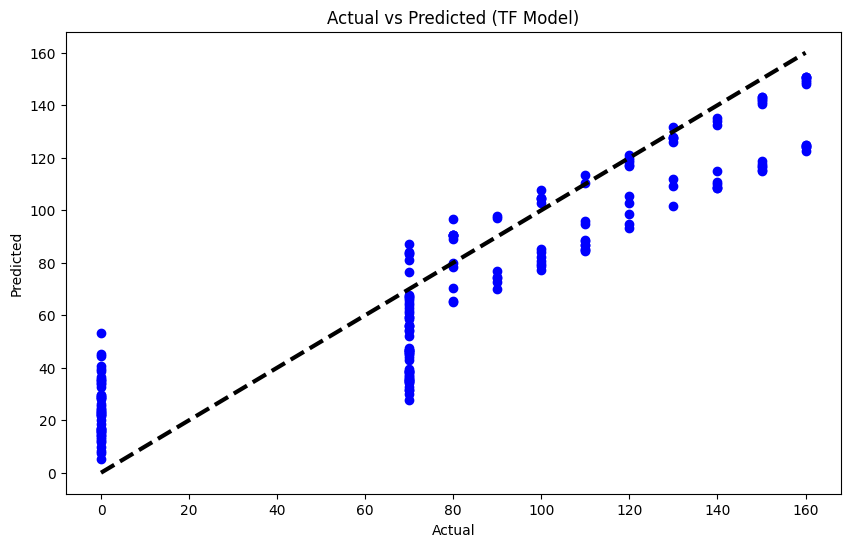

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_tf_flat, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (TF Model)')
plt.show()

In [ ]:
from sklearn.linear_model import Lasso
import joblib


Model Lasso w uczeniu maszynowym odnosi się do metody regresji, która wprowadza regularyzację poprzez karanie współczynników cech, co pomaga w redukcji przeuczenia się modelu. Lasso (Least Absolute Shrinkage and Selection Operator) jest szczególnym przypadkiem regresji grzbietowej (ridge regression), gdzie funkcja celu modelu regresji jest zmaksymalizowana poprzez dodanie kary równoważnej wartości bezwzględnej współczynnika do kosztu funkcji celu.


In [ ]:
lasso = Lasso(alpha = 0.91)
model = lasso.fit(x_train, y_train)
pred_train_lasso= lasso.predict(x_train)

print("Training RMSE and R2 score:")
print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print(r2_score(y_train, pred_train_lasso))

pred_test_lasso= lasso.predict(x_test)
print("Testing RMSE and R2 score:")
print(np.sqrt(mean_squared_error(y_test,pred_test_lasso)))
print(r2_score(y_test, pred_test_lasso))

Training RMSE and R2 score:
21.902226445679002
0.8279619168984317
Testing RMSE and R2 score:
22.921276540649163
0.8071691820593507


In [ ]:
resultss_ = pd.DataFrame({
    'Actual': y_test,
    'Predicted': pred_test_lasso.astype(int)
})
resultss_

,Actual,Predicted
521,0,20
737,0,20
740,70,34
660,100,92
411,130,139
...,...,...
408,110,97
332,160,120
208,110,97
613,80,83


In [ ]:
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(alphas = [0.0001, 0.001,0.01, 0.1, 1, 10], random_state=0).fit(x_train, y_train)

In [ ]:
print(lasso_cv.score(x_train, y_train))
print(lasso_cv.score(x_test, y_test))

0.8290078374937523
0.8094662013865157
